# Logistic Regression using IMDB Reviews (large) datasets

The source of this dataset can be accessed through the following link: http://ai.stanford.edu/~amaas/data/sentiment/
This dataset provides data for train and test. Each of dataset contains 25,000 instances.

In this program, we are using the Count Vectorizer to count the text frequency given in the datasets. Thus, for the sake of memory limitation, we limited the maximum number of feature by 10,000. In this way, we could transform the matrix to dense for further scaling the data using the StandardScaler by sklearn. 

In [1]:
import glob
import numpy as np
import graphviz
from sklearn import linear_model
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cross_validation import train_test_split, ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from prettytable import PrettyTable
from scipy.sparse import csr_matrix
from sklearn.metrics import accuracy_score

c:\users\anne soraya\appdata\local\programs\python\python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Load the dataset

In [3]:
def load_imdb(path):
    
    print("Loading the imdb data")
    
    train_neg_files = glob.glob(path+"/train/neg/*.txt")
    train_pos_files = glob.glob(path+"/train/pos/*.txt")
    
    X_train_corpus = []
    y_train = []
    
    for tnf in train_neg_files:
        f = open(tnf, 'r', encoding="utf8")
        line = f.read()
        X_train_corpus.append(line)
        y_train.append(0)
        f.close()
    
    for tpf in train_pos_files:
        f = open(tpf, 'r', encoding="utf8")
        line = f.read()
        X_train_corpus.append(line)
        y_train.append(1)
        f.close()
    
    print("Train Data loaded.")
    
    test_neg_files = glob.glob(path+"/test/neg/*.txt")
    test_pos_files = glob.glob(path+"/test/pos/*.txt")
    
    X_test_corpus = []
    y_test = []
    
    for tnf in test_neg_files:
        f = open(tnf, 'r', encoding="utf8")
        X_test_corpus.append(f.read())
        y_test.append(0)
        f.close()
    
    for tpf in test_pos_files:
        f = open(tpf, 'r', encoding="utf8")
        X_test_corpus.append(f.read())
        y_test.append(1)
        f.close()
    
    print("Test Data loaded.")
    
    y_train = np.array(y_train)
    y_test = np.array(y_test)
    
    return X_train_corpus, y_train, X_test_corpus , y_test

In [4]:
X_train_corpus , y_train, X_test_corpus , y_test = load_imdb('./aclImdb')

Loading the imdb data
Train Data loaded.
Test Data loaded.


### Binarize the dataset

In [5]:
def print_features(clf_L1, clf_L2, f_names, msg, iter_range=10):
    idx_L2 = np.argsort(np.absolute(clf_L2.coef_)[0,:])[::-1]
    idx_L1 = np.argsort(np.absolute(clf_L1.coef_)[0,:])[::-1]
    
    ### Print on Pretty Table
    table_features = PrettyTable(['Rank', 'L2 Features', 'L2 Weight', 'L1 Features', 'L1 Weight'])
    f_list_1 = np.zeros(iter_range, dtype='int16')
    f_list_2 = np.ones(iter_range, dtype='int16')
    
    for idx in range(0,iter_range):
        table_features.add_row([idx+1, 
                                f_names[idx_L2[idx]], 
                                np.around(clf_L2.coef_[0,idx_L2[idx]], decimals=4), 
                                f_names[idx_L1[idx]], 
                                np.around(clf_L1.coef_[0,idx_L1[idx]], decimals=4)])
        f_list_2[idx] = idx_L2[idx]
        f_list_1[idx] = idx_L1[idx]
        
    print('L2 and L1-regularized Logistic Regression Classifier', msg)
    print('Top 10 features and weights (with absolute value)')
    print()
    print(table_features)
    print(' ')
    print('List of features in both L1 and L2 penalty :')
    num=1
    for i in range(0,iter_range):
        for j in range(0,iter_range):
            if f_list_1[i] == f_list_2[j]:
                print('\t', num, f_names[f_list_1[i]])
                num += 1

In [6]:
y_train = np.array(y_train)
y_test = np.array(y_test)

tf_vectorizer = CountVectorizer(max_df=1.0, min_df=2, max_features = 10000, binary=True)

print('Data Vectorizer Transform start')
print()
X_train = tf_vectorizer.fit_transform(X_train_corpus)

print('Train Data Transformed')
print('Train Data size ', X_train.shape)
print()
X_test = tf_vectorizer.transform(X_test_corpus)
print('Test Data Transformed')
print('Test Data size ', X_test.shape)

Data Vectorizer Transform start

Train Data Transformed
Train Data size  (25000, 10000)

Test Data Transformed
Test Data size  (25000, 10000)


In [7]:
f_names = tf_vectorizer.get_feature_names()

### Fit the Model to the Data without Z-score scaling

In [8]:
clf_noz_l2 = LogisticRegression()
clf_noz_l2.fit(X_train, y_train)
print(clf_noz_l2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [9]:
idx_noz_l2 = np.argsort(np.absolute(clf_noz_l2.coef_)[0,:])[::-1]

In [10]:
clf_noz_l1 = LogisticRegression(penalty='l1')
clf_noz_l1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
idx_noz_l1 = np.argsort(np.absolute(clf_noz_l1.coef_)[0,:])[::-1]

In [12]:
print_features(clf_noz_l1, clf_noz_l2, f_names, 'without Z-score scaling', iter_range=20)

L2 and L1-regularized Logistic Regression Classifier without Z-score scaling
Top 10 features and weights (with absolute value)

+------+----------------+-----------+--------------+-----------+
| Rank |  L2 Features   | L2 Weight | L1 Features  | L1 Weight |
+------+----------------+-----------+--------------+-----------+
|  1   |     waste      |   -2.376  |    wayans    |  -4.0908  |
|  2   |     worst      |  -2.3141  |  vengeance   |   3.245   |
|  3   | disappointment |  -2.2132  |    greene    |   3.0827  |
|  4   |     poorly     |  -2.0917  |   cerebral   |   3.0473  |
|  5   |    unfunny     |  -1.9441  | abomination  |  -2.9896  |
|  6   |     refer      |  -1.8773  |    finely    |   2.8893  |
|  7   |   vengeance    |   1.8422  |   lifeless   |  -2.8084  |
|  8   |  appreciated   |   1.8079  |     café     |   2.7899  |
|  9   |    cerebral    |   1.7976  | unremarkable |  -2.7801  |
|  10  |   laughable    |  -1.7907  |    refer     |   -2.712  |
|  11  |   refreshing   |  

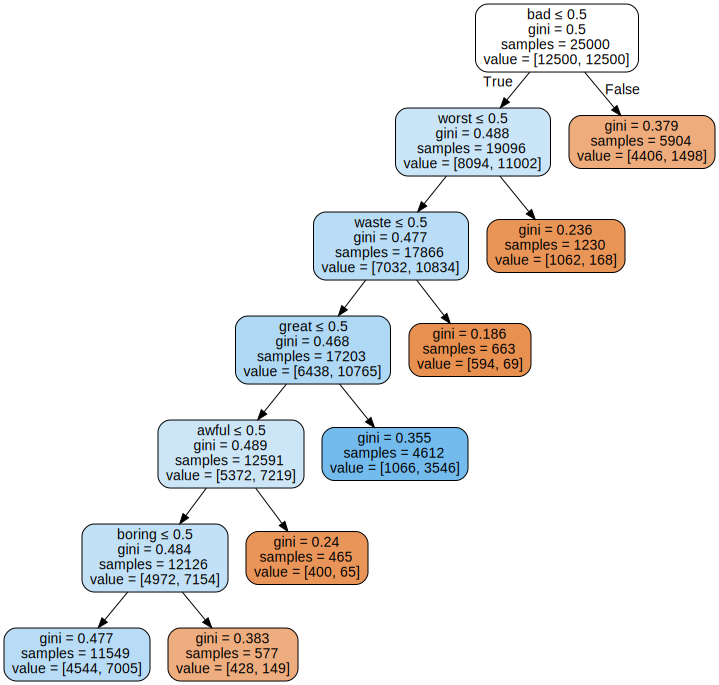

In [13]:
clf_tree = DecisionTreeClassifier(max_depth=6, min_impurity_decrease=0.005)
clf_tree.fit(X_train, y_train)

tree_plot = tree.export_graphviz(clf_tree, out_file=None, 
                                      feature_names=f_names, 
                                      filled=True, rounded=True, 
                                      special_characters=True) 
tree_graph_noz = graphviz.Source(tree_plot)
tree_graph_noz

In [14]:
y_pred_1 = clf_noz_l2.predict(X_test)
print(accuracy_score(y_pred_1, y_test))
y_pred_2 = clf_noz_l1.predict(X_test)
print(accuracy_score(y_pred_2, y_test))
y_pred_3 = clf_tree.predict(X_test)
print(accuracy_score(y_pred_3, y_test))

0.85908
0.86388
0.70412


# Result Discussion
## Original Data

1. The accuracy score for Logistic regression with L2 penalty : 0.85908
2. The accuracy score for Logistic regression with L1 penalty : 0.86392
3. The accuracy score for Decision tree : 0.70412
4. Regarding the top 10 words/features w.r.t weights/coefficient <br>
The L1 and L2 penalty gives a different result on their weight. By looking on the table itself, only 3 features which intersect between L1 and L2. However, eventhough those features are intersected, it is hard to say that it indicates the similarity between both penalty. 

### Fit the Model to the Data with Z-score scaling

In [15]:
### Transform the X_train to dense
X_train_dense = X_train.todense()
X_test_dense = X_test.todense()

In [16]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_dense)
X_train_scaled.shape

c:\users\anne soraya\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(25000, 10000)

In [17]:
X_test_scaled = scaler.transform(X_test_dense)
X_test_scaled.shape

c:\users\anne soraya\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(25000, 10000)

In [18]:
clf_l2 = LogisticRegression()
clf_l2.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
#idx_l2 = np.argsort(np.absolute(clf_l2.coef_)[0,:])[::-1]

In [20]:
clf_l1 = LogisticRegression(penalty='l1')
clf_l1.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
#idx_l1 = np.argsort(np.absolute(clf_l1.coef_)[0,:])[::-1]

In [22]:
print_features(clf_l1, clf_l2, f_names, 'with Z-score scaling', iter_range=20)

L2 and L1-regularized Logistic Regression Classifier with Z-score scaling
Top 10 features and weights (with absolute value)

+------+----------------+-----------+----------------+-----------+
| Rank |  L2 Features   | L2 Weight |  L1 Features   | L1 Weight |
+------+----------------+-----------+----------------+-----------+
|  1   |     worst      |  -1.3315  |     worst      |  -1.3357  |
|  2   |      bad       |   -1.155  |     waste      |  -1.1687  |
|  3   |     waste      |   -1.065  |      bad       |  -1.0952  |
|  4   |     great      |   0.9473  |   excellent    |   0.8932  |
|  5   |   excellent    |   0.9285  |     awful      |  -0.8444  |
|  6   |     awful      |   -0.853  |     great      |   0.816   |
|  7   |     boring     |  -0.8322  |    perfect     |   0.7098  |
|  8   |    terrible    |  -0.7751  |     boring     |  -0.6994  |
|  9   |      best      |   0.7082  |      best      |   0.6748  |
|  10  |     worse      |  -0.7064  |     poorly     |  -0.6733  |
|  1

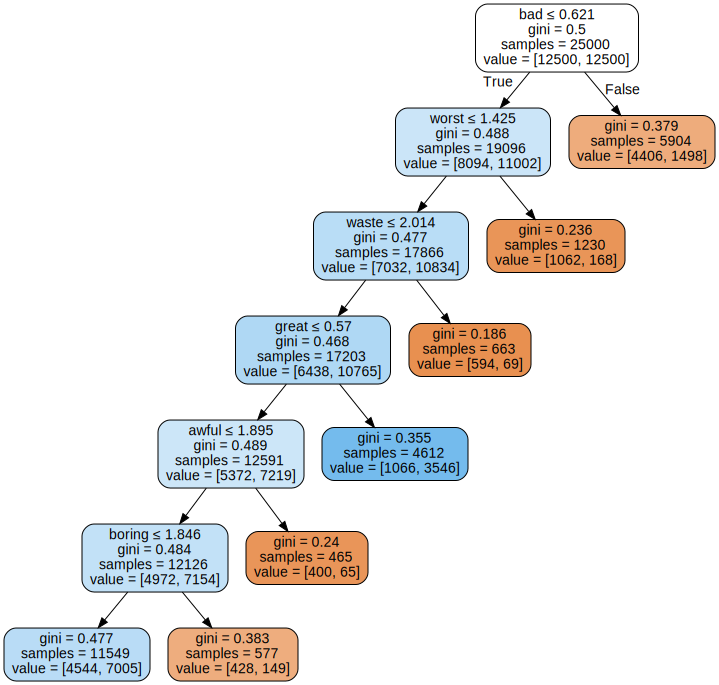

In [23]:
clf_tree = DecisionTreeClassifier(max_depth=6, min_impurity_decrease=0.005)
clf_tree.fit(X_train_scaled, y_train)

tree_plot = tree.export_graphviz(clf_tree, out_file=None, 
                                      feature_names=f_names, 
                                      filled=True, rounded=True, 
                                      special_characters=True) 
tree_graph_noz = graphviz.Source(tree_plot)
tree_graph_noz

In [24]:
y_pred = clf_l2.predict(X_test_scaled)
print(accuracy_score(y_pred, y_test))
y_pred_z = clf_l1.predict(X_test_scaled)
print(accuracy_score(y_pred_z, y_test))
y_pred_tree = clf_tree.predict(X_test_scaled)
print(accuracy_score(y_pred_tree, y_test))

0.8248
0.83616
0.70412


In [25]:
y_pred_proba = clf_l2.predict_proba(X_test_scaled)
y_pred_proba.shape

(25000, 2)

In [26]:
y_pred_log_proba = clf_l2.predict_log_proba(X_test_scaled)
y_pred_log_proba.shape

c:\users\anne soraya\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:1356: RuntimeWarning: divide by zero encountered in log
  return np.log(self.predict_proba(X))


(25000, 2)

In [27]:
clf_l2.coef_.shape

(1, 10000)

In [28]:
clf_l2.intercept_

array([-0.36362513])

# Result Discussion
## Z-score scaled data

1. The accuracy score for Logistic regression with L2 penalty : 0.8248
2. The accuracy score for Logistic regression with L1 penalty : 0.8362
3. The accuracy score for Decision tree : 0.70412

In the decision tree classifier, the tree graph shows the exactly same result according to the gini index. Here, it might because of the gini index does not change significantly when the data are scaled. Since it calculate the impurity of the item. 
<br>
The number of features intersect between L1 and L2 penalty is higher compare to the result using the original data. Also the weight difference and the order are similar between those two. 
<br>
Calculating by using scale data produce similar accuracy. However, the major drawbacks using the scaled data is the high consume in memory, since we need to treat the data in dense matrix. 

## Evaluate the Model
### Calculating Evidence and print the results

In [29]:
def print_object_evidence(msg, obj_idx, X_test, y_pred, y_pred_proba, X_ev, pos_ev, neg_ev, f_names, iter_range=10):
    print(msg)
    print(' ')
    print('Index of the object : ', obj_idx)
    print(X_test[obj_idx, :])
    print('Class : ', y_test[obj_idx])
    print('Predict Class : ', y_pred[obj_idx])

    if y_test[obj_idx] != y_pred[obj_idx]:
        print('----------False Positive-------------')
        print(' ')

    print('a) Total  positive evidence : ', pos_ev[obj_idx])
    print('b) Total negative evidence : ', neg_ev[obj_idx])
    print('c) Probability distribution', y_pred_proba[obj_idx])

    feature_pos = X_ev[obj_idx,:]
    pos_list = np.argsort(feature_pos)[::-1]
    feature_neg = X_ev[obj_idx,:]
    neg_list = np.argsort(feature_neg)

    print('d) Top', iter_range, 'features values that contribute most to the positive evidence')
    for i in range(0,iter_range):
    #    print('\t',pos_list[i], '\t Evidence Value : ', np.sort(feature_pos)[::-1][i])
        print(' ',i+1, f_names[pos_list[i]], '\t Value: ', X_test[obj_idx, pos_list[i]], '\t Evidence: ', np.sort(feature_pos)[::-1][i], '\tCoef_: ', coef_[0, pos_list[i]])   

    print('e) Top', iter_range, 'features values that contribute most to the negative evidence')
    for j in range(0,iter_range):
    #    print('\t',neg_list[j], '\t Evidence Value : ', np.sort(feature_neg)[j])
        print(' ',j+1, f_names[neg_list[j]], '\t Value: ', X_test[obj_idx, neg_list[j]], '\t Evidence: ', np.sort(feature_neg)[j], '\tCoef_: ', coef_[0, pos_list[i]])

In [30]:
'''Copy the data X and coefficient w_i'''
X = np.copy(X_test_scaled)
coef_ = np.copy(clf_l2.coef_)
n_samples, n_features = X.shape

'''Initialize X_ev : x_i * w_i'''
X_ev = np.zeros((n_samples, n_features))

In [31]:
'''Get evidence'''
'''Calculate the w_ia_i'''
for idx in range(n_samples):
    X_ev[idx, :] = X[idx,:] * coef_

'''Generate the sets of P and N'''
X_pos_ev = X_ev * (X_ev > 0)
X_neg_ev = X_ev * (X_ev < 0)

'''Sum each the set P and N'''
pos_ev = np.sum(X_pos_ev, axis=1)
neg_ev = np.sum(X_neg_ev, axis=1)


### The most positive object with respect to the probabilities

In [32]:
most_pos_obj_idx = np.argmax(y_pred_proba[:,1])

In [33]:
print_object_evidence('Most Positive Object w.r.t Probabilities', 
                      most_pos_obj_idx, X_test_scaled, y_pred, y_pred_proba, X_ev, pos_ev, neg_ev, f_names, iter_range=10)

Most Positive Object w.r.t Probabilities
 
Index of the object :  870
[-0.05701343 -0.09422382 -0.3958677  ..., -0.07060258 -0.03288111
 -0.03466182]
Class :  0
Predict Class :  1
----------False Positive-------------
 
a) Total  positive evidence :  246.575760346
b) Total negative evidence :  -207.908050888
c) Probability distribution [ 0.  1.]
d) Top 10 features values that contribute most to the positive evidence
  1 hateful 	 Value:  22.3383079037 	 Evidence:  6.06728521574 	Coef_:  0.271608988555
  2 cultures 	 Value:  22.7998538007 	 Evidence:  5.72497975419 	Coef_:  0.251097213352
  3 counterparts 	 Value:  24.9799919936 	 Evidence:  4.46719718252 	Coef_:  0.17883100938
  4 commendable 	 Value:  23.2911627204 	 Evidence:  4.18851717856 	Coef_:  0.179832893224
  5 primary 	 Value:  15.8595476772 	 Evidence:  3.77227673278 	Coef_:  0.237855253476
  6 devastated 	 Value:  28.380479434 	 Evidence:  3.47796091513 	Coef_:  0.122547644878
  7 perfectly 	 Value:  6.42659975673 	 Evidenc

### The most negative object with respect to the probabilities.

In [34]:
most_neg_obj_idx = np.argmin(y_pred_proba[:,1])

In [35]:
print_object_evidence('Most Negative Object w.r.t Probabilities', 
                      most_neg_obj_idx, X_test_scaled, y_pred, y_pred_proba, X_ev, pos_ev, neg_ev, f_names)

Most Negative Object w.r.t Probabilities
 
Index of the object :  10505
[-0.05701343 -0.09422382 -0.3958677  ..., -0.07060258 -0.03288111
 -0.03466182]
Class :  0
Predict Class :  0
a) Total  positive evidence :  127.850456971
b) Total negative evidence :  -273.93573712
c) Probability distribution [  1.00000000e+00   2.50062493e-64]
d) Top 10 features values that contribute most to the positive evidence
  1 nerdy 	 Value:  27.0978618649 	 Evidence:  4.44843873911 	Coef_:  0.164161983012
  2 servant 	 Value:  18.7380008554 	 Evidence:  4.25232782324 	Coef_:  0.226936045956
  3 washed 	 Value:  20.0555679663 	 Evidence:  3.46922698246 	Coef_:  0.172980739727
  4 rocks 	 Value:  14.0503629282 	 Evidence:  3.46200150079 	Coef_:  0.246399435979
  5 tortured 	 Value:  15.0423644176 	 Evidence:  3.0355835299 	Coef_:  0.201802286238
  6 lucky 	 Value:  9.92983351449 	 Evidence:  2.95922316126 	Coef_:  0.298013371215
  7 magic 	 Value:  7.89247358187 	 Evidence:  2.09249006288 	Coef_:  0.265124

### The object that has the largest positive evidence.

In [36]:
most_pos_ev_idx = np.argmax(pos_ev)

In [37]:
print_object_evidence('Object with Largest Positive Evidence', 
                      most_neg_obj_idx, X_test_scaled, y_pred, y_pred_proba, X_ev, pos_ev, neg_ev, f_names, iter_range=10)

Object with Largest Positive Evidence
 
Index of the object :  10505
[-0.05701343 -0.09422382 -0.3958677  ..., -0.07060258 -0.03288111
 -0.03466182]
Class :  0
Predict Class :  0
a) Total  positive evidence :  127.850456971
b) Total negative evidence :  -273.93573712
c) Probability distribution [  1.00000000e+00   2.50062493e-64]
d) Top 10 features values that contribute most to the positive evidence
  1 nerdy 	 Value:  27.0978618649 	 Evidence:  4.44843873911 	Coef_:  0.164161983012
  2 servant 	 Value:  18.7380008554 	 Evidence:  4.25232782324 	Coef_:  0.226936045956
  3 washed 	 Value:  20.0555679663 	 Evidence:  3.46922698246 	Coef_:  0.172980739727
  4 rocks 	 Value:  14.0503629282 	 Evidence:  3.46200150079 	Coef_:  0.246399435979
  5 tortured 	 Value:  15.0423644176 	 Evidence:  3.0355835299 	Coef_:  0.201802286238
  6 lucky 	 Value:  9.92983351449 	 Evidence:  2.95922316126 	Coef_:  0.298013371215
  7 magic 	 Value:  7.89247358187 	 Evidence:  2.09249006288 	Coef_:  0.265124747

### The object that has the largest negative evidence.

In [38]:
most_neg_ev_idx = np.argmin(neg_ev)

In [39]:
print_object_evidence('Object with Largest Negative Evidence', 
                      most_neg_ev_idx, X_test_scaled, y_pred, y_pred_proba, X_ev, pos_ev, neg_ev, f_names, iter_range=10)

Object with Largest Negative Evidence
 
Index of the object :  18112
[-0.05701343 -0.09422382 -0.3958677  ..., -0.07060258 -0.03288111
 -0.03466182]
Class :  1
Predict Class :  0
----------False Positive-------------
 
a) Total  positive evidence :  382.427437176
b) Total negative evidence :  -427.889603233
c) Probability distribution [  1.00000000e+00   1.25346369e-20]
d) Top 10 features values that contribute most to the positive evidence
  1 conquest 	 Value:  27.9329554469 	 Evidence:  9.18373672488 	Coef_:  0.328777838862
  2 photograph 	 Value:  25.9745197391 	 Evidence:  8.42567162368 	Coef_:  0.324382191021
  3 disappoint 	 Value:  15.9405784342 	 Evidence:  5.69362841332 	Coef_:  0.357178281631
  4 stadium 	 Value:  27.5059222273 	 Evidence:  5.47382474842 	Coef_:  0.199005316135
  5 wherein 	 Value:  30.4125948568 	 Evidence:  5.35278625715 	Coef_:  0.176005575399
  6 supports 	 Value:  26.3333333333 	 Evidence:  4.85451549412 	Coef_:  0.18434868965
  7 abandoned 	 Value:  11

### The most uncertain object with respect to the probabilities.

In [40]:
uncertain_idx = np.argmin(np.square(y_pred_proba[:,1]-0.5))

In [41]:
print_object_evidence('The most uncertain object', 
                      uncertain_idx, X_test_scaled, y_pred, y_pred_proba, X_ev, pos_ev, neg_ev, f_names, iter_range=10)

The most uncertain object
 
Index of the object :  20173
[-0.05701343 -0.09422382 -0.3958677  ..., -0.07060258 -0.03288111
 -0.03466182]
Class :  1
Predict Class :  0
----------False Positive-------------
 
a) Total  positive evidence :  93.2688955077
b) Total negative evidence :  -92.9057482248
c) Probability distribution [ 0.50011946  0.49988054]
d) Top 10 features values that contribute most to the positive evidence
  1 accompanying 	 Value:  23.5490032816 	 Evidence:  4.52513525647 	Coef_:  0.192158249857
  2 opposite 	 Value:  9.85084847545 	 Evidence:  2.24566161822 	Coef_:  0.227966314152
  3 traditional 	 Value:  10.3776515732 	 Evidence:  2.17389692394 	Coef_:  0.209478696468
  4 insane 	 Value:  11.0249271929 	 Evidence:  1.75189438735 	Coef_:  0.158903034614
  5 capable 	 Value:  10.564687057 	 Evidence:  1.6711730641 	Coef_:  0.158184814665
  6 great 	 Value:  1.72048899145 	 Evidence:  1.62984964849 	Coef_:  0.947317685021
  7 shows 	 Value:  3.47200666578 	 Evidence:  1.6